## **Assignment 2 - Machine Learning - LB01**
### **Fendy Wijaya - 2602092150**

###Import Library and CSV File

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
train = pd.read_csv('train.csv')

###Data Identification

Data identification merupakan deskripsi gambaran awal terhadap data yang digunakan sebagai langkah awal sebelum memulai analisis terhadap data.

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data pertama diidentifikasi melalui method head(), yang menampilkan gambaran data melalui 5 data pertama.

In [ ]:
print(len(train.index))
print(len(train.columns))

1460
81


Identifikasi banyaknya baris data melalui atribut index dan banyaknya kolom data melalui atribut columns. Banyaknya baris (row) sejumlah 1460 data, yang kira-kira lumayan banyak. Banyaknya kolom (column) sejumlah 81, yang berarti feature dalam data training ini terbilang cukup banyak. Feature yang akan digunakan tidak semuanya, melainkan harus di-drop terlebih dahulu beberapa feature yang dirasa tidak perlu setelah analisis lebih lanjut.

In [ ]:
print(sum(train.isna().sum()))

7829


Menentukan jumlah missing value pada data dengan menggunakan method isna(). Terlihat bahwa jumlah data yang hilang (bernilai null atau NaN) masih sangat banyak.

In [ ]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Deskripsi numerik terhadap feature yang menjadi variabel dependen (y) pada data train. Dalam kasus ini, feature 'SalePrice' menjadi variabel dependen yang akan dimodelkan kebergantungannya terhadap feature lainnya.

###Exploratory Data Analysis (EDA)

EDA bertujuan untuk menganalisis data yang telah dimiliki agar kita memperoleh insight dari data tersebut untuk keputusan lebih lanjut.

####Pengambilan Feature yang Berkorelasi Kuat

In [ ]:
numeric_cols = train.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
print('Most correlated feature with SalePrice')
print(corr['SalePrice'].sort_values(ascending = False), '\n')

Most correlated feature with SalePrice
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578

Mengecek korelasi dari setiap feature dengan variabel dependen 'SalePrice'. Koefisien korelasi bermakna nilai pengaruh suatu variabel independen x (feature) terhadap variabel dependen y. Range korelasi berkisar dari -1 sampai 1. Nilai koefisien korelasi positif bermakna ada korelasi positif antara variabel independen dengan variabel dependen. Semakin mendekati 1, maka semakin kuat korelasi positifnya. Sebaliknya, koefisien korelasi negatif bermakna ada korelasi negatif antara variabel independen dengan variabel dependen. Semakin mendekati -1, maka semakin kuat korelasi negatifnya.

In [ ]:
corr_sale = corr['SalePrice']
corr_sale = corr_sale[corr_sale < 0.4]
corr_sale = corr_sale[corr_sale > -0.4]
corr_sale

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallCond     -0.077856
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64

In [ ]:
train = train.drop(corr_sale.index, axis=1)

Untuk kasus ini, kita akan membuang feature-feature yang korelasinya lemah terhadap 'SalePrice'. Korelasi dibatasi hanya sampai 0,4 dan -0,4. Artinya, feature yang memiliki korelasi dari -0,4 sampai 0,4 akan diambil untuk di-drop dari data.

In [ ]:
train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,548,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,460,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,608,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,642,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,836,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [ ]:
numeric_cols = train.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
print('Most correlated feature with SalePrice')
print(corr['SalePrice'].sort_values(ascending = False), '\n')

Most correlated feature with SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64 



Begini tampilan data setelah beberapa feature berkorelasi lemah dibuang. Tersisa hanya 57 kolom saja dengan korelasi yang sudah di atas 0,4.

In [ ]:
train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

Kolom feature yang masih tersisa.

####Pemeriksaan Distribusi Data dan Penghapusan Outlier

Dari koefisien korelasi di atas, terlihat bahwa feature 'OverallQual' memiliki korelasi terkuat di antara semua feature. Maka, untuk memperoleh hasil yang baik, data dalam feature ini harus diperiksa kondisinya terlebih dahulu. Dalam hal ini, data 'OverallQual' diperiksa distribusi datanya agar tidak menyimpang dari semestinya.

Feature 'OverallQual' merupakan data numerik ordinal, sehingga pemeriksaan distribusi data dapat dilakukan dengan membentuk diagram batang frekuensi dari data 'OverallQual'.

Text(0.5, 1.0, 'Overall Quality Distribution')

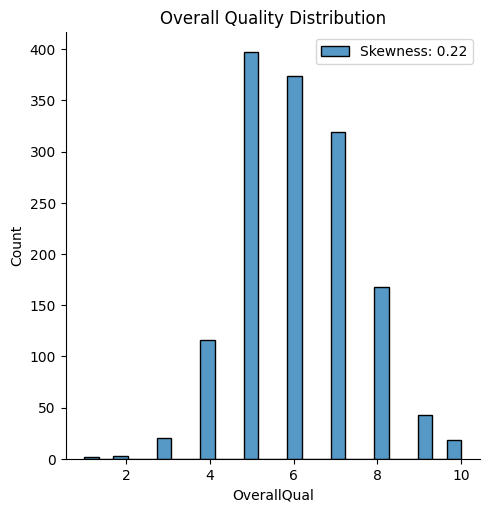

In [ ]:
sns.displot(train['OverallQual'], label = 'Skewness: %.2f'%(train['OverallQual'].skew()))
plt.legend(loc = 'best')
plt.title("Overall Quality Distribution")

Terlihat bahwa kecenderungan data masih membentuk kurva distribusi normal dengan kemiringan (skewness) sebesar 22%. Data ini masih aman dan dapat masuk ke proses pemodelan tanpa ada perubahan lagi.

Selain itu, feature 'GrLivArea' juga merupakan salah satu feature yang korelasinya kuat, sehingga distribusi datanya perlu diperiksa lebih lanjut. Oleh karena datanya bersifat numerik nominal, maka sebarannya akan dipetakan melalui scatter plot.

Text(0.5, 0, 'GrLivingArea Living Area Square Feet')

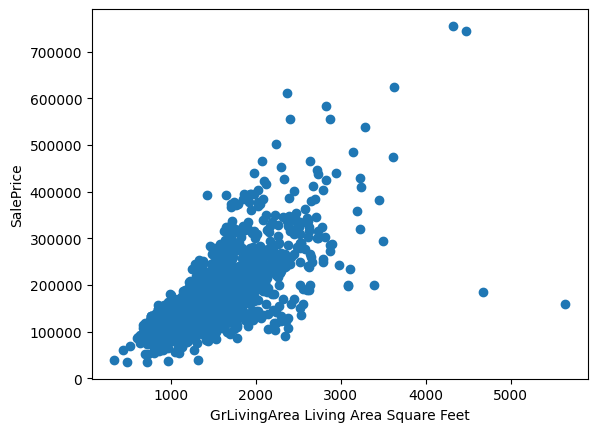

In [ ]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivingArea Living Area Square Feet')

Dari hasil plotting, terlihat korelasinya moderat positif, tetapi tampak ada beberapa outlier yang cukup jauh dari posisi pemusatan data. Kita perlu mendeteksi outlier tersebut untuk dibuang agar tidak mengganggu data yang lain.

In [ ]:
train.shape

(1460, 57)

Ini adalah bentuk data sebelum pembuangan outlier, terlihat ada 1460 data. Nilai ini cukup banyak sehingga pembuangan beberapa outlier tidak menjadi masalah.

Deteksi outlier pada kasus ini akan menggunakan metode Jangkauan Interkuartil atau Interquartile Range (IQR) Method. Diketahui penentuan outlier melalui metode IQR mengikuti formula sebagai berikut:

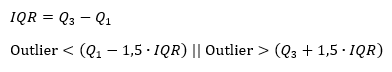

In [ ]:
first_quartile = train['GrLivArea'].quantile(0.25)
third_quartile = train['GrLivArea'].quantile(0.75)

iqr = third_quartile - first_quartile
Tmin = first_quartile - 1.5 * iqr
Tmax = third_quartile + 1.5 * iqr

filtered_values = train[(train['GrLivArea'] < Tmin) | (train['GrLivArea'] > Tmax)]['GrLivArea'].values
print(filtered_values)

train = train[~train['GrLivArea'].isin(filtered_values)]
train.shape

[2945 3222 3608 3112 2794 3493 2978 3228 4676 2775 3194 3395 4316 3279
 3140 2822 2872 2898 3082 2868 2828 3627 3086 2872 4476 3447 5642 2810
 2792 3238 2784]


(1429, 57)

Setelah diperoleh outlier, data outlier tersebut di-drop, sehingga menyisakan 1429 data saja.

Pencarian outlier dilanjutkan pada feature berkorelasi kuat selanjutnya, yaitu 'TotalBsmtSF', yang juga merupakan data numerik nominal. Analisis sebaran dilakukan menggunakan scatter plot.

Text(0.5, 0, 'Total Basmement Area Square Feet')

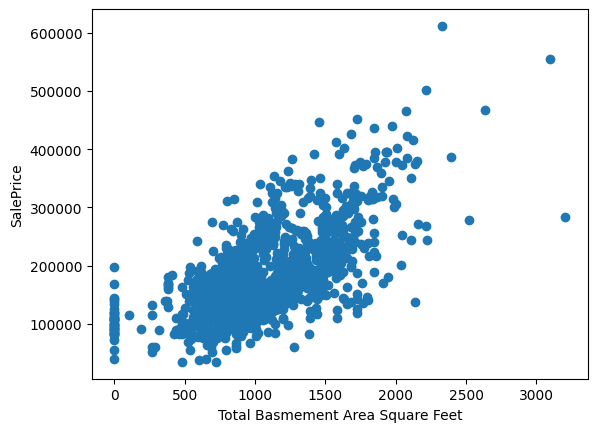

In [ ]:
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('Total Basmement Area Square Feet')

Sama seperti feature 'GrLivArea', feature ini juga berkorelasi moderat positif, dengan adanya sebaran aneh di depan, yaitu adanya beberapa data yang nilainya nol, yang tentu jauh dari pusat sebaran data.

Pencarian outlier dilakukan dengan menggunakan metode IQR juga, tetapi dengan penyesuaian tambahan. Jika diproses lebih lanjut, diperoleh bahwa data bernilai nol juga terhitung sebagai outlier. Akan tetapi, jika dianalisis lebih dalam, feature ini menunjukkan seberapa besar luas basement yang dimiliki oleh sebuah rumah. Dalam hal ini, bukan hal aneh jika ada sebuah rumah yang tidak memiliki basement, sehingga nilai luasnya nol. Maka, data-data yang bernilai nol tidak bisa kita kategorikan sebagai outlier, sehingga harus dihilangkan dari data pencarian outlier.

In [ ]:
first_quartile = train['TotalBsmtSF'].quantile(0.25)
third_quartile = train['TotalBsmtSF'].quantile(0.75)

iqr = third_quartile - first_quartile
Tmin = first_quartile - 1.5 * iqr
Tmax = third_quartile + 1.5 * iqr

filtered_values = train[(train['TotalBsmtSF'] < Tmin) | (train['TotalBsmtSF'] > Tmax)]['TotalBsmtSF'].values
filtered_values = [i for i in filtered_values if i != 0]
print(filtered_values)

train = train[~train['TotalBsmtSF'].isin(filtered_values)]
train.shape

[2223, 2216, 2392, 2121, 2000, 2136, 3206, 3094, 2153, 2006, 2035, 2042, 2109, 2077, 2046, 2078, 2217, 2330, 2524, 2158, 2136, 2076, 2110, 2002, 2633]


(1404, 57)

Setelah data outlier di-drop, tersisa hanya 1404 data saja.

###Data Preprocessing

Selanjutnya, kita akan melakukan preprocessing pada data yang sudah dianalisis pada tahap EDA.

####Handling Missing Values (1)

In [ ]:
train_percentage = train.isnull().sum() / train.shape[0]
print(train_percentage[train_percentage > 0.80])
train = train.drop(train_percentage[train_percentage > 0.80].index, axis=1)

Alley          0.936610
PoolQC         0.997863
Fence          0.806268
MiscFeature    0.962963
dtype: float64


Dari semua kolom, ada beberapa feature yang tingkat kekosongannya cukup tinggi. Jika kita tampilkan feature yang memiliki null value lebih dari 80% jumlah datanya, terlihat ada 4 feature yang memenuhi kriteria tersebut. Oleh karena dalam bentuk kosongnya saja tidak memengaruhi hasil, maka lebih baik feature tersebut di-drop saja.

In [ ]:
train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2003.0,RFn,2,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,1976.0,RFn,2,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2001.0,RFn,2,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1998.0,Unf,3,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2000.0,RFn,3,836,TA,TA,Y,WD,Normal,250000


Tersisa 53 kolom saja sampai saat ini.

####Encoding Data Kategorik

Data yang bersifat kategorik perlu di-encoding ke dalam wujud numerik agar dapat dibaca oleh model. Dalam hal ini, teknik encoding yang digunakan adalah LabelEncoder(), dengan alasan kemudahan dan banyaknya feature yang sifatnya ordinal, meskipun feature tersebut merupakan data kategorik.

In [ ]:
le = preprocessing.LabelEncoder()
for name in train.columns:
    if train[name].dtypes == 'O':
        train[name] = train[name].astype(str)
        le.fit(train[name])
        train[name] = le.transform(train[name])

Setiap data dengan tipe data Object menandakan bahwa data tersebut belum bersifat numerik, alias masih dalam bentuk kategorik, sehingga perlu ditransformasi ke dalam bentuk numerik.

In [ ]:
train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,2003.0,1,2,548,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,1976.0,1,2,460,4,4,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,2001.0,1,2,608,4,4,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,1998.0,2,3,642,4,4,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,2000.0,1,3,836,4,4,2,8,4,250000


Tampilan setelah dilakukan encoding.

####Handling Missing Values (2)

In [ ]:
for column in train.columns:
    null_vals = train.isnull().values
    a,b = np.unique(train.values[~null_vals], return_counts=1)
    train.loc[train[column].isna(), column] = np.random.choice(a, train[column].isnull().sum(), p = b / b.sum())

Untuk setiap data di semua kolom, apabila masih bernilai null, baik itu kategorik ataupun numerik, akan diisi oleh probabilitas kemunculan nilai terbesar yang memungkinkan pada kolom data tersebut.

####Standardisasi Data Numerik

In [ ]:
train['YearBuilt'] = (train['YearBuilt'] - train['YearBuilt'].mean()) / train['YearBuilt'].std()
train['YearRemodAdd'] = (train['YearRemodAdd'] - train['YearRemodAdd'].mean()) / train['YearRemodAdd'].std()
train['MasVnrArea'] = (train['MasVnrArea'] - train['MasVnrArea'].mean()) / train['MasVnrArea'].std()
train['TotalBsmtSF'] = (train['TotalBsmtSF'] - train['TotalBsmtSF'].mean()) / train['TotalBsmtSF'].std()
train['1stFlrSF'] = (train['1stFlrSF'] - train['1stFlrSF'].mean()) / train['1stFlrSF'].std()
train['GrLivArea'] = (train['GrLivArea'] - train['GrLivArea'].mean()) / train['GrLivArea'].std()
train['GarageYrBlt'] = (train['GarageYrBlt'] - train['GarageYrBlt'].mean()) / train['GarageYrBlt'].std()
train['GarageArea'] = (train['GarageArea'] - train['GarageArea'].mean()) / train['GarageArea'].std()

Dari sekian banyak kolom feature, dipilih beberapa kolom yang berisi data-data numerik yang range-nya cukup jauh dari data-data lainnya. Teknik yang digunakan untuk menanganinya adalah standardisasi dengan menggunakan rumus Z-Score.

In [ ]:
train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,-0.036243,1,2,0.422166,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,-0.039879,1,2,-0.009121,4,4,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,-0.036512,1,2,0.716226,4,4,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,-0.036916,2,3,0.882859,4,4,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,-0.036647,1,3,1.833652,4,4,2,8,4,250000


Berikut adalah data setelah distandardisasi.

###Pembuatan dan Evaluasi Model

In [ ]:
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Definisikan variabel independen X untuk semua feature kecuali 'SalePrice', karena 'SalePrice' adalah variabel dependen y. Data di-split dengan besar training size 70% dan testing size 30%.

In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

Sesuai dengan topik materi, model yang akan digunakan adalah model regresi linear (Linear Regression). Data X dan y di-fit sedemikian rupa untuk proses training, lalu diujikan pada data testing untuk memperoleh nilai prediksi hasil regresi.

In [ ]:
print(sqrt(mean_squared_error(y_test, predictions)))
print(mean_absolute_error(y_test, predictions))

23689.22267357089
17113.386346391188


Hasil regresi testing dievaluasi dengan metrics berupa RMSE (Root Mean Squared Error) dan MAE (Mean Absolute Error) untuk memperoleh perkiraan error dari setiap data aslinya.

In [ ]:
print(f"Nilai R2 score = {round(model.score(X_test, y_test) * 100, 2)} %")

Nilai R2 score = 87.37 %


Selain itu, metrics R2 score (koefisien determinasi) juga dapat digunakan untuk memperoleh besarnya kemungkinan variabel independen X dapat menjelaskan variabel dependen y pada model. **Dari hasil tersebut, diketahui bahwa model regresi linear yang dibentuk telah berhasil sekitar 87% untuk menjelaskan keterkaitan feature-feature yang ada terhadap harga jual rumah**.